# Convolutional Neural Networks

"Deep Learning" is a general term that usually refers to the use of neural networks with multiple layers that synthesize the way the human brain learns and makes decisions. A convolutional neural network is a kind of neural network that extracts *features* from matrices of numeric values (often images) by convolving multiple filters over the matrix values to apply weights and identify patterns, such as edges, corners, and so on in an image. The numeric representations of these patterns are then passed to a fully-connected neural network layer to map the features to specific classes.

## Basic Neural Network Recap

Your brain works by connecting networks of neurons, each of which receives electrochemical stimuli from multiple inputs, which cause the neuron to fire under certain conditions. When a neuron fires, it creates an electrochemical charge that is passed as an input to one or more other neurons, creating a complex *feed-forward* network made up of layers of neurons that pass the signal on. An artificial neural network uses the same principles but the inputs are numeric values with associated *weights* that reflect their relative importance. The neuron take these input values and weights and applies them to an *activation function* that determines the ouput that the artificial neuron passes onto the next layer:

<br/>
<div align="center" style='font-size:24px;'>&#8694;&#9711;&rarr;</div>

As the human brain learns from experience, the inputs to the neurons are strenghtened or weakened depending on their importance to the decisions that the brain needs to make in response to stimuli. Similarly, you train an artificial neural network using a supervised leaning technique in which a *loss function* is used to evaluate how well the multi-layered model detects known labels. You can then find the derivative of the loss function to determine whether the level of error (loss) is reduced by increasing or decreasing the weights associated with the inputs, and then apply *backpropagation* to adjust the weights and improve the model iteratively over multiple training *epochs*. The result of this training is a deep learning model that consists of:
* An *input* layer to which the initial input variables are passed.
* One or more *hidden* layers in which the weights optimized by training determine the signal that is fed forward through the network.
* An *output* layer that presents the results.

## Convolutional Neural Networks (CNNs)
Convolutional Neural Networks, or *CNNs*, are a particular type of artificial neural network that works well with matrix inputs, such as images (which are fundamentally just multi-dimensional matrices of pixel intensity values). There are various kinds of layer in a CNN, but a common architecture is to build a sequence of *convolutional* layers that find patterns in indvidual areas of the input matrix and *pooling* layers that aggregate these patterns. Additionally, some layers may *drop* data (which helps avoid *overfitting* the model to the training data), and finally some layers will *flatten* the matrix data and a linear *dense*, or *fully connected* layer will perform classification and reshape the predictions to conform with the expected output format.

Conceptually, a Convolutional Neural Network for image classification is made up of multiple layers that extract features, such as edges, corners, etc; followed by one or more fully-connected layers to classify objects based on these features. You can visualize this like this:

<table>
    <tr><td rowspan=2 style='border: 1px solid black;'>&#x21d2;</td><td style='border: 1px solid black;'>Convolutional Layer</td><td style='border: 1px solid black;'>Pooling Layer</td><td style='border: 1px solid black;'>Convolutional Layer</td><td style='border: 1px solid black;'>Pooling Layer</td><td style='border: 1px solid black;'>Drop Layer</td><td style='border: 1px solid black;'>Fully Connected Layer</td><td rowspan=2 style='border: 1px solid black;'>&#x21d2;</td></tr>
    <tr><td colspan=5 style='border: 1px solid black; text-align:center;'>Feature Extraction</td><td style='border: 1px solid black; text-align:center;'>Classification</td></tr>
</table>

*Note: In Machine Learning, particularly "deep learning", matrices used in neural networks are often referred to as **tensors**. In a simplistic (which is to say, not strictly accurate) sense, a tensor is just a generalized term for a multi-dimensional matrix. In some deep learning frameworks, like PyTorch, a tensor is a specific type of data structure with properties and methods that support deep learning operations.*

### Convolutional Layers
Convolutional layers apply filters to a subregion of the input image, and *convolve* the filter across the image to extract features (such as edges, corners, etc.). For example, suppose the following matrix represents the pixels in a 6x6 image:

$$\begin{bmatrix}255 & 255 & 255 & 255 & 255 & 255\\255 & 255 & 0 & 0 & 255 & 255\\255 & 0 & 0 & 0 & 0 & 255\\255 & 0 & 0 & 0 & 0 & 255\\255 & 255 & 0 & 0 & 255 & 255\\255 & 255 & 255 & 255 & 255 & 255\end{bmatrix}$$

And let's suppose that a filter matrix is defined as a matrix of *weight* values like this:

$$\begin{bmatrix}0 & 1 & 0\\0 & 1 & 0\\0 & 1 & 0\end{bmatrix}$$

The convolution layer applies the filter to the image matrix one "patch" at a time; so the first operation would apply to the <span style="color:red">red</span> elements below:

$$\begin{bmatrix}\color{red}{255} & \color{red}{255} & \color{red}{255} & 255 & 255 & 255\\\color{red}{255} & \color{red}{255} & \color{red}{0} & 0 & 255 & 255\\\color{red}{255} & \color{red}{0} & \color{red}{0} & 0 & 0 & 255\\255 & 0 & 0 & 0 & 0 & 255\\255 & 255 & 0 & 0 & 255 & 255\\255 & 255 & 255 & 255 & 255 & 255\end{bmatrix}$$

To apply the filter, we multiply the patch area by the filter elementwise, and add the results:

$$\begin{bmatrix}255 & 255 & 255\\255 & 255 & 0\\255 & 0 & 0\end{bmatrix} \times \begin{bmatrix}0 & 1 & 0\\0 & 1 & 0\\0 & 1 & 0\end{bmatrix}= \begin{bmatrix}(255 \times 0) + (255 \times 1) + (255 \times 0) & +\\ (255 \times 0) + (255 \times 1) + (0 \times 0) & + \\ (255 \times 0) + (0 \times 1) + (0 \times 0)\end{bmatrix}  = 510$$

This result is then used as the value for the first element of a feature map:

$$\begin{bmatrix}\color{red}{510} & ? & ? & ?\\? & ? & ? & ?\\? & ? & ? & ?\\? & ? & ? & ?\end{bmatrix}$$

Next we move the patch along one pixel and apply the filter to the new patch area:

$$\begin{bmatrix}255 & \color{red}{255} & \color{red}{255} & \color{red}{255} & 255 & 255\\255 & \color{red}{255} & \color{red}{0} & \color{red}{0} & 255 & 255\\255 & \color{red}{0} & \color{red}{0} & \color{red}{0} & 0 & 255\\255 & 0 & 0 & 0 & 0 & 255\\255 & 255 & 0 & 0 & 255 & 255\\255 & 255 & 255 & 255 & 255 & 255\end{bmatrix}$$

$$\begin{bmatrix}255 & 255 & 255\\255 & 0 & 0\\0 & 0 & 0\end{bmatrix} \times \begin{bmatrix}0 & 1 & 0\\0 & 1 & 0\\0 & 1 & 0\end{bmatrix}= \begin{bmatrix}(255 \times 0) + (255 \times 1) + (255 \times 0) & +\\ (255 \times 0) + (0 \times 1) + (0 \times 0) & + \\ (0 \times 0) + (0 \times 1) + (0 \times 0)\end{bmatrix}  = 255 $$

So can fill in that value on our feature map:
$$\begin{bmatrix}510 & \color{red}{255} & ? & ?\\? & ? & ? & ?\\? & ? & ? & ?\\? & ? & ? & ?\end{bmatrix}$$

Then we just repeat the process, moving the patch across the entire image matrix until we have a completed feature map like this:

$$\begin{bmatrix}510 & 255 & 255 & 510\\255 & 0 & 0 & 255\\255 & 0 & 0 & 255\\510 & 255 & 255 & 510\end{bmatrix}$$

You'll have noticed that as a result of convolving a patch across the original image, we've "lost" a 1-pixel strip around the edge. Typically, we apply a *padding* rule to keep the convolved image the same size as the original image, often by simply filling a 1-pixel wide edge with 0 values, like this:

$$\begin{bmatrix}0 & 0 & 0 & 0 & 0 & 0\\0 & 510 & 255 & 255 & 510 & 0\\0 & 255 & 0 & 0 & 255 & 0\\0 & 255 & 0 & 0 & 255 & 0\\0 & 510 & 255 & 255 & 510 & 0\\0 & 0 & 0 & 0 & 0 & 0\end{bmatrix}$$

### Pooling Layers
After using one or more convolution layers to create a filter map, you can use a pooling layer to  reduce the number of dimensions in the matrix. A common technique is to use *MaxPooling*, in which a patch is applied to the matrix and the maximum value within the mask is retained while the others are discarded.

For example, we could apply a 2x2 patch to our feature map to extract the largest value in each 2x2 subarea:

$$\begin{bmatrix}\color{blue}{0} & \color{blue}{0} & \color{green}{0} & \color{green}{0} & \color{red}{0} & \color{red}{0}\\\color{blue}{0} & \color{blue}{510} & \color{green}{255} & \color{green}{255} & \color{red}{510} & \color{red}{0}\\\color{magenta}{0} & \color{magenta}{255} & \color{orange}{0} & \color{orange}{0} & \color{cyan}{255} & \color{cyan}{0}\\\color{magenta}{0} & \color{magenta}{255} & \color{orange}{0} & \color{orange}{0} & \color{cyan}{255} & \color{cyan}{0}\\\color{brown}{0} & \color{brown}{510} & 255 & 255 & \color{yellow}{510} & \color{yellow}{0}\\\color{brown}{0} & \color{brown}{0} & 0 & 0 & \color{yellow}{0} & \color{yellow}{0}\end{bmatrix}\Longrightarrow \begin{bmatrix}\color{blue}{510} & \color{green}{255} & \color{red}{510}\\\color{magenta}{255} & \color{orange}{0} & \color{cyan}{255}\\\color{brown}{510} & 255 & \color{yellow}{510}\end{bmatrix}$$

### Activation Functions
After each layer of filtering or pooling, it's common to apply a *rectified linear unit (ReLU)* function to the feature maps that have been produced. This has the effect of ensuring that all values in the feature maps are zero or higher.

### Dense (Fully-Connected) Layers
After the previous layers have created feature maps, a final linear *fully-connected* layer is used to generate class predictions - you can think of the fully-connected layer as being the endpoint of the classifier what determines which combination of features found in the previous layers "adds up" to a particular class. To create a fully-connected layer, the feature maps are flattened into a single 1-dimensional matrix and a function is applied to calculate the probability for each class that the model is designed to predict - usually this final function is a *Sigmoid* or *SoftMax* function that assigns a value between 0 and 1 to each class, with the total of these assignments adding to 1:

$$\begin{bmatrix}510 & 255 & 510\\255 & 0 & 255\\510 & 255 & 510\end{bmatrix}\begin{bmatrix}255 & 255 & 510\\255 & 0 & 255\\510 & 255 & 255\end{bmatrix}...$$

$$ \Downarrow $$

$$\begin{bmatrix}510 & 255 & 510 & 255 & 0 & 255 & 510 & 255 & 510 & 255 & 255 & 510 & 255 & 0 & 255 & 510 & 255 & 255 ...\end{bmatrix}$$

$$ \Downarrow $$

$$\begin{bmatrix}C_{1} & C_{2} & C_{3} \\ 0.15 & 0.8 & 0.05\end{bmatrix}$$

### Backpropagation
When we train a CNN, we perform mulitple passes forward through the network of layers, and then use a *loss function* to measure the difference between the output values (which you may recall are probability predictions for each class) and the actual values for the known image classes used to train the model (in other words, 1 for the correct class and 0 for all the others). For example, in the example above the predicted probabilities are 0.15 for C<sub>1</sub>, 0.8 for C<sub>2</sub>, and 0.05 for C<sub>3</sub>. Let's suppose that the image in question is an example of C<sub>2</sub>, so the expected output is actually 0 for C<sub>1</sub>, 1 for C<sub>2</sub>, and 0 for C<sub>3</sub>. The error (or *loss*) represents how far from the expected values our results are.

Having calculated the loss, the training process uses a specified *optimizer* to calculate the derivitive of the loss function wit respect to the weights and biases used in the network layers, and determine how best to adjust them to reduce the loss. We then go backwards through the network, adjusting the weights before the next forward pass. The degree to which we adjust the weights is determined by the *learning rate* - the larger the learning rate, the bigger the adjustments made to the weights.

## Building a CNN
There are several commonly used frameworks for creating CNNs, including *PyTorch*, *Tensorflow*, the *Microsoft Cognitive Toolkit (CNTK)*, and *Keras* (which is a high-level API that can use Tensorflow or CNTK as a back end). 

### A Simple Example
The example we'll use PyTorch to explore this is a classification model that can classify images of geometric shapes.

First, we'll generate some images for our classification model. Run the cell below to do that (note that it may take several minutes to run)

In [1]:
import os

# The images are in a folder named 'shapes/training'
training_folder_name = '../data/shapes/training'

# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(training_folder_name))
print(classes)

['circle', 'square', 'triangle']


### Set up the Framework
Now that we have our data, we're ready to build a CNN. The first step is to install and configure the framework we want to use.

We're going to use PyTorch, so let's import the PyTorch libraries we'll need.

> *Note: The following `pip install` commands install the CPU-based version of PyTorch on Linux, which is appropriate for the Azure Notebooks environment. For instructions on how to install the PyTorch and TorchVision packages on your own system, see https://pytorch.org/get-started/locally/*

In [2]:
# Install PyTorch
!pip install https://download.pytorch.org/whl/cpu/torch-1.0.1.post2-cp36-cp36m-linux_x86_64.whl
!pip install torchvision

# Import PyTorch libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

print("Libraries imported - ready to use PyTorch", torch.__version__)

     |████████████████████████████████| 67.1MB 14kB/s s eta 0:00:01   |███▌                            | 7.3MB 5.6MB/s eta 0:00:11     |███████████▌                    | 24.1MB 8.3MB/s eta 0:00:06     |████████████▉                   | 26.9MB 8.3MB/s eta 0:00:05     |█████████████▏                  | 27.5MB 8.3MB/s eta 0:00:05     |██████████████████████▍         | 47.0MB 511kB/s eta 0:00:40███████████▏      | 52.8MB 6.7MB/s eta 0:00:03     |█████████████████████████▌      | 53.5MB 6.7MB/s eta 0:00:03��████████████████████▋   | 59.9MB 870kB/s eta 0:00:09�█████████████████████████▏ | 63.3MB 870kB/s eta 0:00:05��██████████████████████████▌ | 64.0MB 870kB/s eta 0:00:04
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
Libraries imported - ready to use PyTorch 1.0.1.post2


### Prepare the Data
PyTorch includes functions for loading and transforming data. We'll use these to create an iterative loader for training data, and a second iterative loader for test data (which we'll use to validate the trained model). The loaders will transform the image data into *tensors*, which are the core data structure used in PyTorch, and normalize them so that the pixel values are in a scale with a mean of 0.5 and a standard deviation of 0.5.

Run the following cell to define the data loaders.

In [4]:
# Function to ingest data using training and test loaders
def load_dataset(data_path):
    # Load all of the images
    transformation = transforms.Compose([
        # transform to tensors
        transforms.ToTensor(),
        # Normalize the pixel values (in R, G, and B channels)
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Load all of the images, transforming them
    full_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transformation
    )
    
    
    # Split into training (70% and testing (30%) datasets)
    train_size = int(0.7 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    
    # define a loader for the training data we can iterate through in 50-image batches
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
    
    # define a loader for the testing data we can iterate through in 50-image batches
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
        
    return train_loader, test_loader


# Get the iterative dataloaders for test and training data
train_loader, test_loader = load_dataset(training_folder_name)
batch_size = train_loader.batch_size
print("Data loaders ready to read", training_folder_name)

Data loaders ready to read ../data/shapes/training


### Define the CNN
In PyTorch, you define a neural network model as a class that is derived from the **nn.Module** base class. Your class must define the layers in your network, and provide a **forward** method that is used to process data through the layers of the network.

In [5]:
# Create a neural net class
class Net(nn.Module):
    # Constructor
    def __init__(self, num_classes=3):
        super(Net, self).__init__()
        
        # In the init function, define each layer we will use in our model
        
        # Our images are RGB, so input channels = 3. We'll apply 12 filters in the first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        
        # A second convolutional layer takes 12 input channels, and generates 24 outputs
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        
        # We'll apply max pooling with a kernel size of 2
        self.pool = nn.MaxPool2d(kernel_size=2)
        
        # Our 128x128 image tensors will be pooled twice with a kernel size of 2. 128/2/2 is 32.
        # So our feature tensors are now 32 x 32, and we've generated 24 of them
        # We need to flatten these and feed them to a fully-connected layer
        # to map them to  the probability for each class
        self.fc = nn.Linear(in_features=32 * 32 * 24, out_features=num_classes)

    def forward(self, x):
        # In the forward function, pass the data through the layers we defined in the init function
        
        # Use a relu activation function after layer 1 (convolution 1 and pool)
        x = F.relu(self.pool(self.conv1(x)))
        
        # Use a relu activation function after layer 2
        x = F.relu(self.pool(self.conv2(x)))   
        
        # Flatten
        x = x.view(-1, 32 * 32 * 24)
        # Feed to fully-connected layer to predict class
        x = self.fc(x)
        # Return class probabilities via a log_softmax function 
        return torch.log_softmax(x, dim=1)
    
device = "cpu"
if (torch.cuda.is_available()):
    # if GPU available, use cuda (on a cpu, training will take a considerable length of time!)
    device = "cuda"

# Create an instance of the model class and allocate it to the device
model = Net(num_classes=len(classes)).to(device)

print(model)

Net(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=24576, out_features=3, bias=True)
)


Note that in the input layer, we pass an image, which is 128x128 pixels x 3 channels. this is followed by:
- A convolution layer then applies 12 3x3 filters with a padding of 1 , so the output is 128x128x12.
- A pooling layer thenapplies a 2x2 filter, halving the size of each pixel layer; which gives us an output of 64x64x12.
- Then another convolution layer uses 24 3x3 filters to produce an output of 64x64x24.
- Another pooling layer halves the pixel dimensions, so now we have 32x32x24.
- When we flatten this, 32x32x24 gives us 24,576 individual values
- Finally, we feed these into a dense layer that produces 3 outputs - a probability value for each of our three classes.

Note that the flattened layer that defines the input to our fully-connected neural network always expects 24,576 values; so working backward from here, our convolutional layers must start with a 128x128 image. Images of a different size or shape will not work with this model.

### Train the Model
Now that we've defined a class for the network, we can train it using the image data.

Training consists of an iterative series of forward passes in which the training data is processed in batches by the layers in the network, and the optimizer goes back and adjusts the weights. We'll also use a separate set of test images to test the model at the end of each iteration (or *epoch*) so we can track the performance improvement as the training process progresses. In this example, we'll use an optimizer based on the *Adam* algorithm and set its *learning rate* parameter (which determines how much the weights are adjusted after backpropagation identifies their affect on loss). These settings can have a significant impact on how well your model (and how quickly) your model learns the optimal weights and bias values required to predict accurately. 

> **Note**: For information about the optimizers available in PyTorch, see https://pytorch.org/docs/stable/optim.html#algorithms

In the example below, we use 5 iterations (*epochs*) to train the model in 30-image batches, holding back 30% of the data for validation. After each epoch, the loss function measures the error (*loss*) in the model and adjusts the weights (which were randomly generated for the first iteration) to try to improve accuracy. 

> **Note**: We're only using 5 epochs to reduce the training time for this simple example. A real-world CNN is usually trained over more epochs than this. CNN model training is processor-intensive, so it's recommended to perform this on a system that can leverage GPUs (such as the Data Science Virtual Machine in Azure) to reduce training time. Status will be displayed as the training progresses.

In [7]:
def train(model, device, train_loader, optimizer, epoch):
    # Set the model to training mode
    model.train()
    train_loss = 0
    print("Epoch:", epoch)
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(train_loader):
        # Use the CPU or GPU as appropriate
        data, target = data.to(device), target.to(device)
        
        # Reset the optimizer
        optimizer.zero_grad()
        
        # Push the data forward through the model layers
        output = model(data)
        
        # Get the loss
        loss = loss_criteria(output, target)

        # Keep a running total
        train_loss += loss.item()
        
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        # Print metrics so we see some progress
        print('\tTraining batch {} Loss: {:.6f}'.format(batch_idx + 1, loss.item()))
            
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
            
            
def test(model, device, test_loader):
    # Switch the model to evaluation mode (so we don't backpropagate or drop)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            # Get the predicted classes for this batch
            output = model(data)
            
            # Calculate the loss for this batch
            test_loss += loss_criteria(output, target).item()
            
            # Calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()

    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss / batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss
    
    
# Use an "Adam" optimizer to adjust weights
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Specify the loss criteria
loss_criteria = nn.CrossEntropyLoss()

# Track metrics in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 5 epochs (in a real scenario, you'd likely use many more)
epochs = 2
print('Training on', device)
for epoch in range(1, epochs + 1):
        train_loss = train(model, device, train_loader, optimizer, epoch)
        test_loss = test(model, device, test_loader)
        epoch_nums.append(epoch)
        training_loss.append(train_loss)
        validation_loss.append(test_loss)

Training on cpu
Epoch: 1
	Training batch 1 Loss: 0.037353
	Training batch 2 Loss: 0.231167
	Training batch 3 Loss: 0.035933
	Training batch 4 Loss: 0.066987
	Training batch 5 Loss: 0.076573
	Training batch 6 Loss: 0.049024
	Training batch 7 Loss: 0.015502
	Training batch 8 Loss: 0.026229
	Training batch 9 Loss: 0.011230
	Training batch 10 Loss: 0.007867
	Training batch 11 Loss: 0.022861
	Training batch 12 Loss: 0.007615
	Training batch 13 Loss: 0.130812
	Training batch 14 Loss: 0.088474
	Training batch 15 Loss: 0.010690
	Training batch 16 Loss: 0.016510
	Training batch 17 Loss: 0.065078
Training set: Average loss: 0.052936
Validation set: Average loss: 0.051382, Accuracy: 357/360 (99%)

Epoch: 2
	Training batch 1 Loss: 0.065079
	Training batch 2 Loss: 0.047538
	Training batch 3 Loss: 0.023345
	Training batch 4 Loss: 0.079270
	Training batch 5 Loss: 0.036796
	Training batch 6 Loss: 0.066468
	Training batch 7 Loss: 0.036403
	Training batch 8 Loss: 0.038849
	Training batch 9 Loss: 0.00811

### View the Loss History
We tracked average training and validation loss for each epoch. We can plot these to verify that loss reduced as the model was trained, and to detect *over-fitting* (which is indicated by a continued drop in training loss after validation loss has levelled out or started to increase.

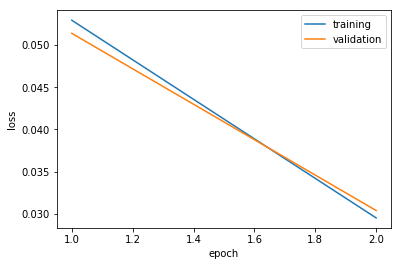

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### Evaluate the model
With our model trained, we'll use it to predict labels for the test data and evaluate its precision, recall, and simple accuracy using the known labels. Then we'll plot the confusion matrix to evaluate how well the model performs for each class label. Keras does not provide a built-in confusion matrix, so we'll use Scikit-Learn.

Getting predictions from test set...


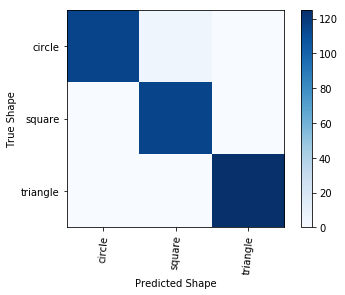

In [9]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import numpy as np

truelabels = []
predictions = []
model.eval()
print("Getting predictions from test set...")
for data, target in test_loader:
    for label in target.data.numpy():
        truelabels.append(label)
    for prediction in model(data).data.numpy().argmax(1):
        predictions.append(prediction) 

# Plot the confusion matrix
cm = confusion_matrix(truelabels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Shape")
plt.ylabel("True Shape")
plt.show()

### Save the Model
Now that we have trained the model, we can save its weights. Then later, we can reload those weights into an instance of the same network and use it to predict classes from new images.

In [10]:
# Save the model weights
model_file = 'shape-classifier.pt'
torch.save(model.state_dict(), model_file)
print("Model saved.")

# Delete the existing model variable
del model

Model saved.


## Use the Model with New Data
Now that we've trained and evaluated our model, we can use it to predict classes for new images.

### Create Functions to Prepare Data and Get Class Predictions
Let's create a couple of functions to:

- Resize new images to match the size on which the model was trained.
- Submit the new images to the model and retrieve the predicted classes.

In [11]:
# Helper function to resize image
def resize_image(src_img, size=(128,128), bg_color="white"): 
    from PIL import Image

    # rescale the image so the longest edge is the right size
    src_img.thumbnail(size, Image.ANTIALIAS)
    
    # Create a new image of the right shape
    new_image = Image.new("RGB", size, bg_color)
    
    # Paste the rescaled image onto the new background
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))
  
    # return the resized image
    return new_image

# Function to predict the class of an image
def predict_image(classifier, image_array):
   
    # Set the classifer model to evaluation mode
    classifier.eval()
    
    # These are the classes our model can predict
    class_names = ['circle', 'square', 'triangle']
    
    # Apply the same transformations as we did for the training images
    transformation = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Preprocess the imagees
    image_tensor = torch.stack([transformation(image).float() for image in image_array])

    # Turn the input into a Variable
    input_features = image_tensor

    # Predict the class of each input image
    predictions = classifier(input_features)
    
    predicted_classes = []
    # Convert the predictions to a numpy array 
    for prediction in predictions.data.numpy():
        # The prediction for each image is the probability for each class, e.g. [0.8, 0.1, 0.2]
        # So get the index of the highest probability
        class_idx = np.argmax(prediction)
        # And append the corresponding class name to the results
        predicted_classes.append(class_names[class_idx])
    return np.array(predicted_classes)

print("Functions created - ready to use model for inference.")

Functions created - ready to use model for inference.


### Predict Image Classes
Now we're ready to use the model for predicting (often referred to as *inferencing*) the classes of some new images.

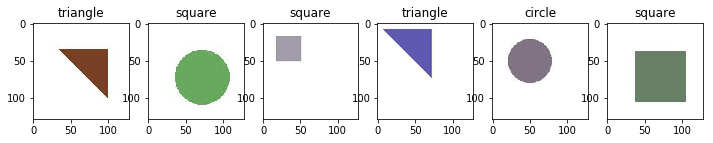

In [12]:
import os
from random import randint
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

# load the saved model weights
model = Net()
model.load_state_dict(torch.load(model_file))


#get the list of test image files
test_folder = '../data/shapes/test'
test_image_files = os.listdir(test_folder)

# Empty array on which to store the images
image_arrays = []

size = (128,128)
background_color="white"

fig = plt.figure(figsize=(12, 8))

# Get the images and show the predicted classes
for file_idx in range(len(test_image_files)):
    img = Image.open(os.path.join(test_folder, test_image_files[file_idx]))
    
    # resize the image so it matches the training set - it  must be the same size as the images on which the model was trained
    resized_img = np.array(resize_image(img, size, background_color))
                      
    # Add the image to the array of images
    image_arrays.append(resized_img)

# Get predictions from the array of image arrays
# Note that the model expects an array of 1 or more images - just like the batches on which it was trained
predictions = predict_image(model, np.array(image_arrays))

# plot easch image with its corresponding prediction
for idx in range(len(predictions)):
    a=fig.add_subplot(1,len(predictions),idx+1)
    imgplot = plt.imshow(image_arrays[idx])
    a.set_title(predictions[idx])


## Learn More

Take a look at the [PyTorch documentation](https://pytorch.org/)